<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%205-%20Weight%20Initialization/Exp_5_Weight_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [ ]:
# Step 1: Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
# Step 2: Function to create a model with specified configurations
def create_model(initializer, regularizer, dropout_rate=None):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dense(256, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dense(10, activation='softmax', kernel_initializer=initializer)
    ])
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Step 3: Initialize models using Xavier/Glorot and Kaiming/He initializers
xavier_model = create_model(GlorotNormal(), regularizers.l2(0.001))
kaiming_model = create_model(HeNormal(), regularizers.l2(0.001))

C:\Users\csconda2\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
C:\Users\csconda2\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
# Step 4: Train both models and store the training history
xavier_history = xavier_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
kaiming_history = kaiming_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 109s 68ms/step - loss: 2.1057 - accuracy: 0.3270 - val_loss: 1.8176 - val_accuracy: 0.3762
Epoch 2/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.7911 - accuracy: 0.3869 - val_loss: 1.7770 - val_accuracy: 0.3950
Epoch 3/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.7296 - accuracy: 0.4060 - val_loss: 1.7036 - val_accuracy: 0.4267
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6905 - accuracy: 0.4204 - val_loss: 1.7053 - val_accuracy: 0.4187
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6765 - accuracy: 0.4242 - val_loss: 1.6573 - val_accuracy: 0.4269
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.6558 - accuracy: 0.4342 - val_loss: 1.6267 - val_accuracy: 0.4462
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6569 - accuracy: 0.4316 - val_loss: 1.6915

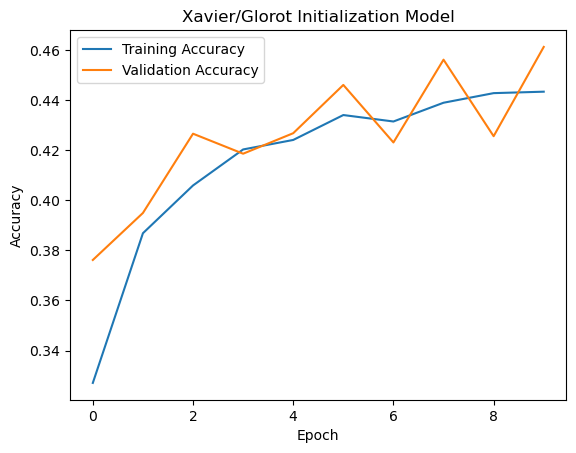

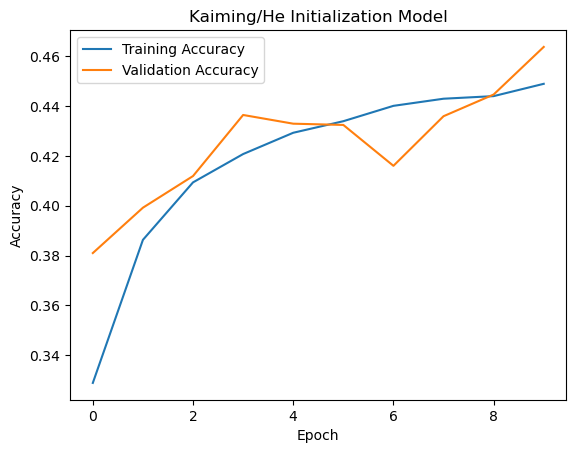

In [ ]:
# Step 5: Evaluate and visualize model performance
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(xavier_history, 'Xavier/Glorot Initialization Model')
plot_history(kaiming_history, 'Kaiming/He Initialization Model')